# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
df = pd.read_csv("./Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [3]:
#To check the shape of the data frame.
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

### Data Manipulation

In [7]:
#Seperating the prediction feature from predicting features. So that data concation become easy and can handle the data easly.
df1 = df[:-1]

In [8]:
#Droping the features with seems irrilevant.
df1 = df1.drop(['PaymentMethod', 'PaperlessBilling','customerID','TotalCharges'], axis=1)

In [9]:
#Using Label encoder to do one hot encoding. 
#Encoding different features as per requirement.
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['gender']= label_encoder.fit_transform(df1['gender']) 
  
df1['gender'].unique()

array([0, 1], dtype=int64)

In [10]:
df1['Partner']= label_encoder.fit_transform(df1['Partner']) 
  
df1['Partner'].unique()

array([1, 0], dtype=int64)

In [11]:
df1['Dependents']= label_encoder.fit_transform(df1['Dependents']) 
  
df1['Dependents'].unique()

array([0, 1], dtype=int64)

In [12]:
df1['PhoneService']= label_encoder.fit_transform(df1['PhoneService']) 
  
df1['PhoneService'].unique()

array([0, 1], dtype=int64)

In [13]:
df1['TechSupport']= label_encoder.fit_transform(df1['TechSupport']) 
  
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
#One hot encoding for prediction feature.
df['Churn']= label_encoder.fit_transform(df['Churn']) 
  
df['Churn'].unique()

array([0, 1], dtype=int64)

In [15]:
#One hot encoded  prediction feature.
churn =df.iloc[:,-1]
#churn

In [16]:
#df1

In [17]:
#One hot encoding as per the requirement and modefying as per requirements.
d5=df1["MultipleLines"]
list5=[]
for i in d5:
    #print(i)
    if i == "Yes":
        list5.append(1)
    else:
        list5.append(0)
MultipleLines=pd.Series(list5)
df1["MultipleLines"]=MultipleLines

In [18]:
#One hot encoding as per the requirement and modefying as per requirements.
d7=df1["OnlineSecurity"]
list7=[]
for i in d7:
    #print(i)
    if i == "Yes":
        list7.append(1)
    else:
        list7.append(0)
OnlineSecurity=pd.Series(list7)
df1["OnlineSecurity"]=OnlineSecurity

In [19]:
#One hot encoding as per the requirement and modefying as per requirements.
d8=df1["OnlineBackup"]
list8=[]
for i in d8:
    #print(i)
    if i == "Yes":
        list8.append(1)
    else:
        list8.append(0)
OnlineBackup=pd.Series(list8)
df1["OnlineBackup"]=OnlineBackup

In [20]:
#One hot encoding as per the requirement and modefying as per requirements.
d9=df1["DeviceProtection"]
list9=[]
for i in d9:
    #print(i)
    if i == "Yes":
        list9.append(1)
    else:
        list9.append(0)
DeviceProtection=pd.Series(list9)
df1["DeviceProtection"]=DeviceProtection

In [21]:
#One hot encoding as per the requirement and modefying as per requirements.
d12=df1["TechSupport"]
list12=[]
for i in d12:
    #print(i)
    if i == "Yes":
        list12.append(1)
    else:
        list12.append(0)
TechSupport=pd.Series(list12)
df1["TechSupport"]=TechSupport

In [22]:
#One hot encoding as per the requirement and modefying as per requirements.
d13=df1["StreamingTV"]
list13=[]
for i in d13:
    #print(i)
    if i == "Yes":
        list13.append(1)
    else:
        list13.append(0)
StreamingTV=pd.Series(list13)
df1["StreamingTV"]=StreamingTV

In [23]:
#One hot encoding as per the requirement and modefying as per requirements.
d14=df1["StreamingMovies"]
list14=[]
for i in d14:
    #print(i)
    if i == "Yes":
        list14.append(1)
    else:
        list14.append(0)
StreamingMovies=pd.Series(list14)
df1["StreamingMovies"]=StreamingMovies

In [24]:
##One hot encoding as per the requirement and modefying as per requirements.
df_InternetService=df1.InternetService.str.get_dummies(',')

In [25]:
#One hot encoding as per the requirement and modefying as per requirements.
df_Contract=df1.Contract.str.get_dummies(',')

In [41]:
# droping raw columns.
df1 = df1.drop(['InternetService', 'Contract','Churn'], axis=1)

In [148]:
#df1

In [43]:
#Concatation of dataset.
df3 = pd.concat([df1, df_InternetService,churn],axis=1, sort=False)

In [47]:
df3.shape

(7043, 18)

In [48]:
#df3

In [49]:
#To check correlation between the features.
df3.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,DSL,Fiber optic,No,Churn
gender,1.000000,-0.001812,-0.001672,0.010610,0.004915,-0.006534,-0.008295,-0.017247,-0.013673,-0.002299,NaN,-0.008572,-0.010666,-0.014763,0.006670,-0.011447,0.006100,-0.008528
SeniorCitizen,-0.001812,1.000000,0.016420,-0.211235,0.016655,0.008597,0.142904,-0.038562,0.066530,0.059524,NaN,0.105470,0.120270,0.220290,-0.108373,0.255435,-0.182781,0.150858
Partner,-0.001672,0.016420,1.000000,0.452630,0.379961,0.017752,0.141957,0.143358,0.141413,0.154007,NaN,0.124862,0.117605,0.097054,-0.000950,0.000459,0.000543,-0.150544
Dependents,0.010610,-0.211235,0.452630,1.000000,0.159866,-0.001731,-0.024607,0.081135,0.023605,0.014093,NaN,-0.016443,-0.039630,-0.113782,0.051947,-0.165734,0.139770,-0.164286
tenure,0.004915,0.016655,0.379961,0.159866,1.000000,0.008386,0.332168,0.326997,0.360480,0.360481,NaN,0.279579,0.285936,0.247701,0.013417,0.019505,-0.038966,-0.352168
PhoneService,-0.006534,0.008597,0.017752,-0.001731,0.008386,1.000000,0.279746,-0.092983,-0.052281,-0.071301,NaN,-0.022635,-0.033021,0.247369,-0.452412,0.289975,0.172238,0.011970
MultipleLines,-0.008295,0.142904,0.141957,-0.024607,0.332168,0.279746,1.000000,0.098322,0.202167,0.201342,NaN,0.257348,0.258946,0.490689,-0.200026,0.366272,-0.210642,0.040032
OnlineSecurity,-0.017247,-0.038562,0.143358,0.081135,0.326997,-0.092983,0.098322,1.000000,0.284056,0.275214,NaN,0.175975,0.187171,0.296381,0.321500,-0.030957,-0.333350,-0.171126
OnlineBackup,-0.013673,0.066530,0.141413,0.023605,0.360480,-0.052281,0.202167,0.284056,1.000000,0.303741,NaN,0.282279,0.274672,0.441995,0.157822,0.165788,-0.381669,-0.082322
DeviceProtection,-0.002299,0.059524,0.154007,0.014093,0.360481,-0.071301,0.201342,0.275214,0.303741,1.000000,NaN,0.390723,0.401964,0.482554,0.146458,0.175867,-0.380710,-0.066053


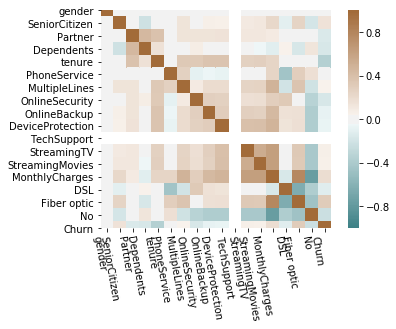

In [114]:
#To check correlation between the features.
corr = df3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 2200, n=2000),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=100000,
    horizontalalignment='right'
);

In [116]:
#Droping the features to avoide multi-collinearity. 
df3 = df3.drop(['No', 'MonthlyCharges','Fiber optic','DSL'], axis=1)

### Data Visualization

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


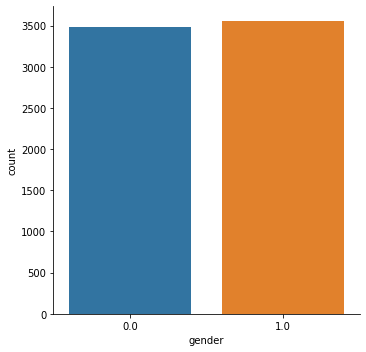

In [117]:
import seaborn as sns
sns.factorplot('gender',data=df3,kind='count')

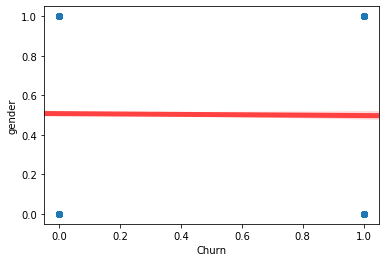

In [118]:
sns.regplot(y=df3["gender"], x=df3["Churn"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

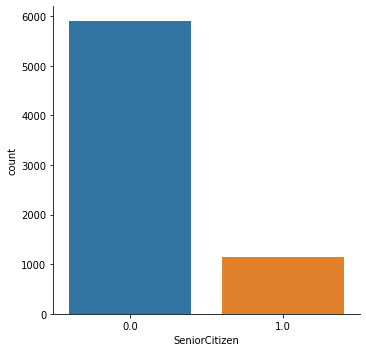

In [119]:
sns.factorplot('SeniorCitizen',data=df3,kind='count')

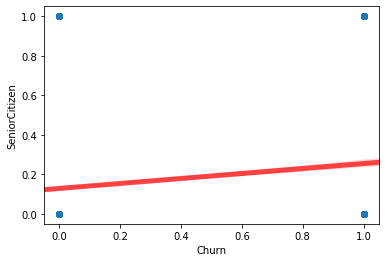

In [120]:
sns.regplot(y=df3["SeniorCitizen"], x=df3["Churn"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

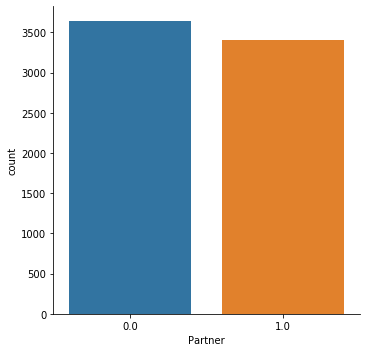

In [121]:
sns.factorplot('Partner',data=df3,kind='count')

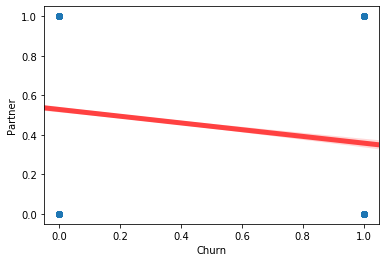

In [122]:
sns.regplot(y=df3["Partner"], x=df3["Churn"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

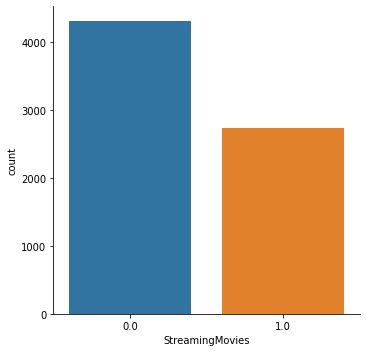

In [123]:
sns.factorplot('StreamingMovies',data=df3,kind='count')

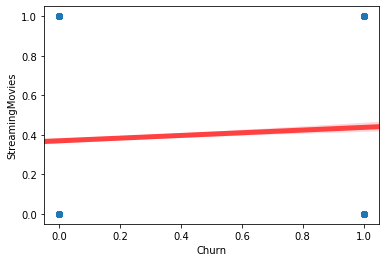

In [124]:
sns.regplot(y=df3["StreamingMovies"], x=df3["Churn"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

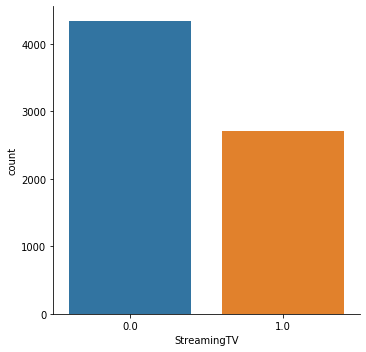

In [125]:
sns.factorplot('StreamingTV',data=df3,kind='count')

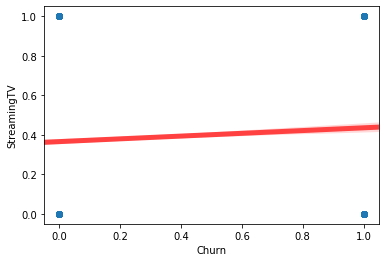

In [126]:
sns.regplot(y=df3["StreamingTV"], x=df3["Churn"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

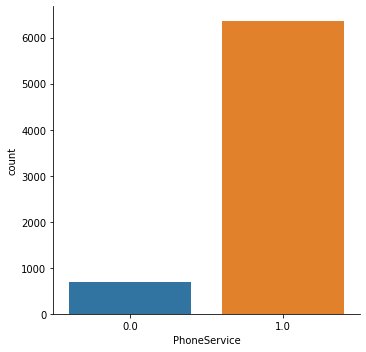

In [127]:
sns.factorplot('PhoneService',data=df3,kind='count')

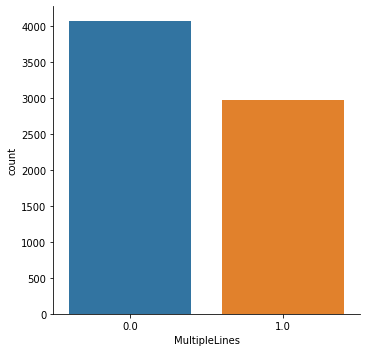

In [128]:
sns.factorplot('MultipleLines',data=df3,kind='count')

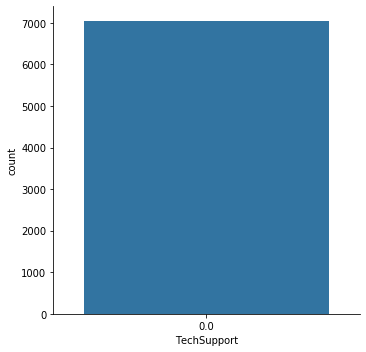

In [129]:
sns.factorplot('TechSupport',data=df3,kind='count')

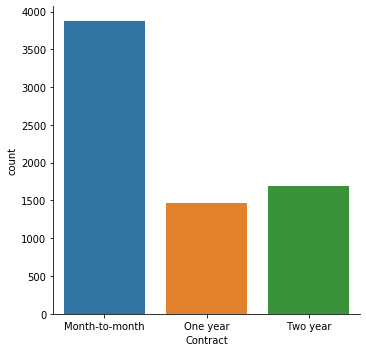

In [130]:
sns.factorplot('Contract',data=df,kind='count')

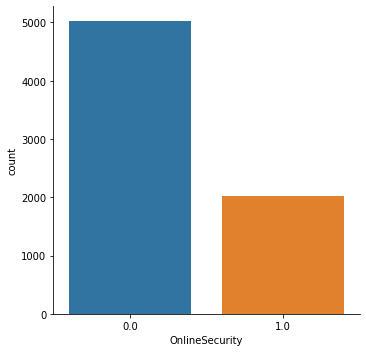

In [131]:
sns.factorplot('OnlineSecurity',data=df3,kind='count')

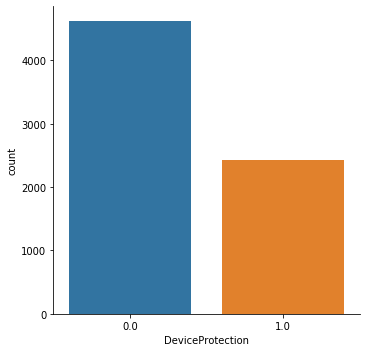

In [132]:
sns.factorplot('DeviceProtection',data=df3,kind='count')

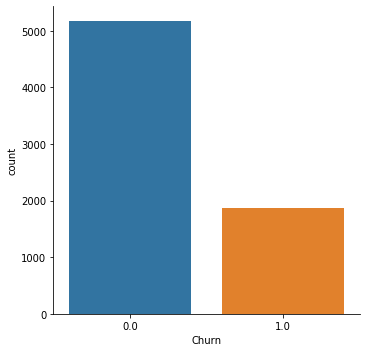

In [133]:
sns.factorplot('Churn',data=df3,kind='count')

1) Gender ratio is almost same (males are bit higher can be neglected).

2) Most of the users are young generation around 6000 (i.e.86% of total population).

3) Not much of people either watch movies or tv.

4) Less no of people have Multiple line.

5) More people prefer month on month basis scheams and they have high corelation (0.40) between month on month basis contract and churn.

6) Approximately 2000 (i.e.28%) of the user churn.

### Implement Machine Learning Models

In [134]:
#Importing sklearn preprocessing lib to preprocess the data and make data fit to prepare model. 
#replace NAN values with the one with high frequency.
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN",strategy = "most_frequent" , axis = 0)
imputer = imputer.fit(df3.iloc[:, 0:28].values)
df3.iloc[:, 0:28] = imputer.transform(df3.iloc[:, 0:28])

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [135]:
#Dividing data into X and Y to make split easy.  
X = df3[list(df3.columns)[0:-1]]
Y = df3[list(df3.columns)[-1]]
print(X.shape)
print("__________________________________________________________________________________________________________________")
print(Y.shape)
#print(X)

(7043, 13)
__________________________________________________________________________________________________________________
(7043,)


In [ ]:
#Dividing data into test and train data to prepare model and model evaluation.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print("__________________________________________________________________________________________________________________")
print(X_test.shape)

In [ ]:
#Scaling the data from -1 to 1 to make data fit for model building.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [137]:
#Importing lib for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [138]:
#fitting the model to X_train, Y_train.
log = LogisticRegression(random_state=42, penalty='l2')
r=log.fit(X_train, Y_train)

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [141]:
print(log)
print("__________________________________________________________________________________________________________________")
print("coefs:", log.coef_)
print("__________________________________________________________________________________________________________________")
print("intercept:", log.intercept_)
print("__________________________________________________________________________________________________________________")
Y_pred = log.predict(X_test)
print("LR accuracy:", accuracy_score(Y_test, Y_pred))
print("LR F1:", f1_score(Y_pred, Y_pred,average='weighted'))
#print("LR CM:\n",  confusion_matrix(Y_test, Y_pred))
LR_CON = confusion_matrix(Y_test, Y_pred)
LR_ACC = accuracy_score(Y_test, Y_pred)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
__________________________________________________________________________________________________________________
coefs: [[-0.07024966  0.34634024  0.00662099 -0.22247561 -0.04484421  0.18697154
   0.54637685 -0.34710225  0.02514086  0.10934372  0.          0.5096908
   0.71545567 -0.03674296  0.35906433  2.38276516 -1.69382003]]
__________________________________________________________________________________________________________________
intercept: [0.75509112]
__________________________________________________________________________________________________________________
LR accuracy: 0.8035967818267865
LR F1: 1.0


# DECISION TREE

In [143]:
#Importing lib for Decision tree analysis.
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=1)
clf_tree.fit(X_train, Y_train)
print(clf_tree)
print("__________________________________________________________________________________________________________________")
tree_predictions = clf_tree.predict(X_test)
print("LR accuracy:", accuracy_score(Y_test, Y_pred))
print("__________________________________________________________________________________________________________________")
print(confusion_matrix(Y_test, tree_predictions))
print("__________________________________________________________________________________________________________________")
print("f1:", f1_score(Y_test, tree_predictions, average='weighted'))
print("__________________________________________________________________________________________________________________")
DT_CON = confusion_matrix(Y_test, tree_predictions)
DT_ACC = accuracy_score(Y_test, Y_pred)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
__________________________________________________________________________________________________________________
LR accuracy: 0.8035967818267865
__________________________________________________________________________________________________________________
[[1419  120]
 [ 306  268]]
__________________________________________________________________________________________________________________
f1: 0.7846450144174664
__________________________________________________________________________________________________________________


# NEURAL NETWORK

In [144]:
#Importing lib for Neural Networks.
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam',                          #For neural network
                    alpha=1e-1,                             #multy level pelsoptrom
                    hidden_layer_sizes=(1000,), 
                    random_state=1, 
                    verbose=True)
#to fit the train datas
mlp.fit(X_train, Y_train)        
print("MLP model:", mlp)
print("__________________________________________________________________________________________________________________")
Y_pred = mlp.predict(X_test)                  #to predict.
print("NN accuracy:", accuracy_score(Y_test, Y_pred))
print("__________________________________________________________________________________________________________________")
print("NN F1:", f1_score(Y_test, Y_pred))
print("__________________________________________________________________________________________________________________")
print("NN CM:\n", confusion_matrix(Y_test, Y_pred))
print("__________________________________________________________________________________________________________________")
NN_CON = confusion_matrix(Y_test, Y_pred)
NN_ACC = accuracy_score(Y_test, Y_pred)

Iteration 1, loss = 0.92981789
Iteration 2, loss = 0.51472107
Iteration 3, loss = 0.46090281
Iteration 4, loss = 0.44989758
Iteration 5, loss = 0.44498761
Iteration 6, loss = 0.44296950
Iteration 7, loss = 0.44055009
Iteration 8, loss = 0.44517122
Iteration 9, loss = 0.44401548
Iteration 10, loss = 0.44072494
Iteration 11, loss = 0.44483956
Iteration 12, loss = 0.44371600
Iteration 13, loss = 0.44089485
Iteration 14, loss = 0.44965782
Iteration 15, loss = 0.43941812
Iteration 16, loss = 0.43396831
Iteration 17, loss = 0.43720712
Iteration 18, loss = 0.44683582
Iteration 19, loss = 0.43418465
Iteration 20, loss = 0.43669452
Iteration 21, loss = 0.43438458
Iteration 22, loss = 0.43360863
Iteration 23, loss = 0.43374245
Iteration 24, loss = 0.43571688
Iteration 25, loss = 0.46045638
Iteration 26, loss = 0.45075606
Iteration 27, loss = 0.44558136
Iteration 28, loss = 0.43514463
Iteration 29, loss = 0.43367901
Iteration 30, loss = 0.43653021
Iteration 31, loss = 0.43644340
Iteration 32, los

# Model Evaluation

# CONFUSION MATRIX, ROC CURVE AND ACCURACY SCORES:-

In [145]:
#Importing lib for making ROC curve.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

# LOGISTIC REGRESSION

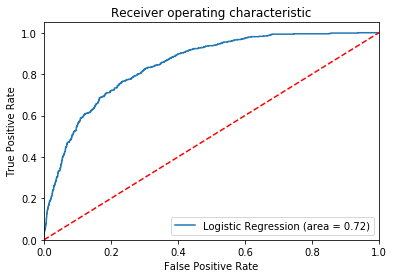

__________________________________________________________________________________________________________________
confusion matrix:-  [[1397  142]
 [ 273  301]]
__________________________________________________________________________________________________________________
accuracy scores:-  80.35967818267865 %
__________________________________________________________________________________________________________________


In [146]:
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#--------------------------------------------------------------------------
print("__________________________________________________________________________________________________________________")
print("confusion matrix:- ",LR_CON)
print("__________________________________________________________________________________________________________________")
print("accuracy scores:- ",LR_ACC*100,"%")
print("__________________________________________________________________________________________________________________")

# DECISION TREE

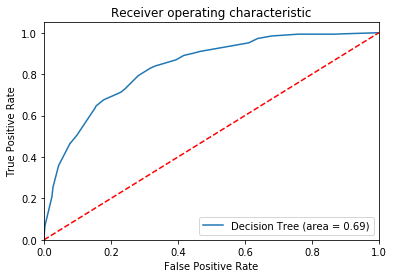

__________________________________________________________________________________________________________________
confusion matrix:-  [[1419  120]
 [ 306  268]]
__________________________________________________________________________________________________________________
accuracy scores:-  80.35967818267865 %
__________________________________________________________________________________________________________________


In [79]:
DEC_roc_auc = roc_auc_score(Y_test, clf_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DEC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#------------------------------------------------------------------------------------------------------------------------------
print("__________________________________________________________________________________________________________________")
print("confusion matrix:- ",DT_CON)
print("__________________________________________________________________________________________________________________")
print("accuracy scores:- ",DT_ACC*100,"%")
print("__________________________________________________________________________________________________________________")

# NEURAL NETWORKS

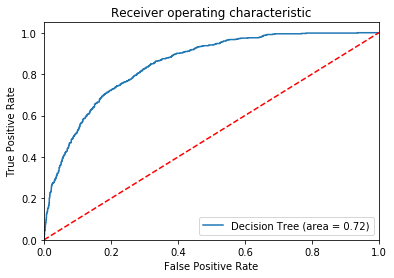

__________________________________________________________________________________________________________________
accuracy scores:-  79.88641741599622 %
__________________________________________________________________________________________________________________
confusion matrix:-  [[1376  163]
 [ 262  312]]
__________________________________________________________________________________________________________________


In [147]:
NN_roc_auc = roc_auc_score(Y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#--------------------------------------------------------------------------------------------------------------------------
print("__________________________________________________________________________________________________________________")
print("accuracy scores:- ",NN_ACC*100,"%")
print("__________________________________________________________________________________________________________________")
print("confusion matrix:- ",NN_CON)
print("__________________________________________________________________________________________________________________")

### Final Conclusions

1) Logistic Regression have high accuracy score and can be used to predict as it have high accuracy score.

2) As the 0.73 or 73% of area are under ROC curve which is maximum compaired to the rest of the other models.   

3) As we have found Logistic Regression to be the best binary Classification model as per the data i have and it also having good accuracy rate around 80.359% therefore we can use this model to predict the possible churn and can make possible action to prevent the churn of customer using different methodology, promotional and other way to retain the customer for long with the service provider.



# Answer related to questions: -

1) For Data cleaning including missing values, outliers i used sklearns preprocessing library Imputer package to transformer classes to change raw feature vectors into a representation that is more suitable In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. 

   In order to find multi-collinearity i made coorealtion matrix. The one with no or little coorelation between the other    features are the one which i considered to build model or having high correlation are to to elliminated. In order to ease the process i draw the heat map to come up with easy and faster way to find the one which have high correlation. 
   
   
   Describetion:- There are many variables which have prediction importance like gender, generation, Partner, dependent, internetservice etc. collectively there are total of 20 features including customer id.   
   
   Selection of variables can be done based on the the results of coorelation matrix the one with less or no coorelation. 

2) Performance of the model is been demonstration above.

3) Key factors that predict customer churn are of one with little or no correlation with other variable. Like gender, partner, dependent, internetservices etc. excluting the few which i droped as a part of multi-collinearity.

4) Offers like moviestreamings coupans, offers can be given to the youngesters, coupans on tv-streming etc.

5) This can be determined using changing the variable with the new and updated one and then we can be remodeled the model using the new data and then repeating the same process of model evaluation if it gives better results than we can say that the changes made are effectives and can be implemented to solve/overcome the churn percentage.
